### Credit Scoring EDA
#### Goals:
1. study data
2. analyze distibutions
3. find possible disbalance 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('data/scoring.csv')
df.head()

,age,income,education,work,car,default
0,27,32,0,0,1,0
1,26,50,1,0,0,0
2,35,20,0,1,0,0
3,35,80,1,1,0,0
4,24,27,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180816 entries, 0 to 180815
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   age        180816 non-null  int64
 1   income     180816 non-null  int64
 2   education  180816 non-null  int64
 3   work       180816 non-null  int64
 4   car        180816 non-null  int64
 5   default    180816 non-null  int64
dtypes: int64(6)
memory usage: 8.3 MB


In [5]:
df.describe()

,age,income,education,work,car,default
count,180816.000000,180816.000000,180816.000000,180816.000000,180816.000000,180816.000000
mean,39.326254,40.835402,0.358525,0.165350,0.311394,0.115222
std,11.528616,43.228440,0.479569,0.371498,0.463065,0.319291
min,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,20.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,30.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,49.000000,1.000000,0.000000,1.000000,0.000000
max,72.000000,1000.000000,1.000000,1.000000,1.000000,1.000000


<Axes: title={'center': 'Target Distribution'}, xlabel='default'>

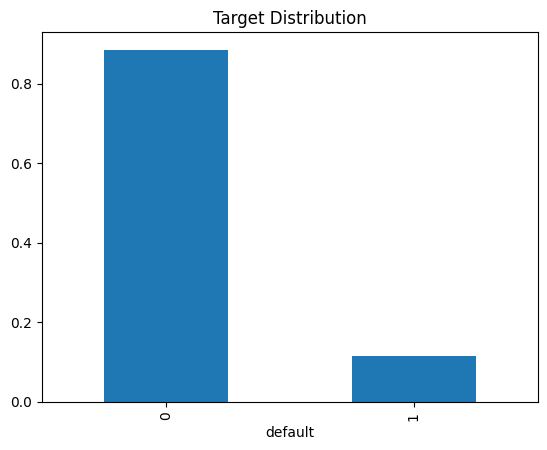

In [8]:
df["default"].value_counts(normalize=True).plot(kind='bar', title='Target Distribution')

### Missing values
The dataset does not contain any null values.  
We can assume that data engineers have already performed the cleaning step.  

In [18]:
null_values = df.isnull().sum()
null_values

age          0
income       0
education    0
work         0
car          0
default      0
dtype: int64

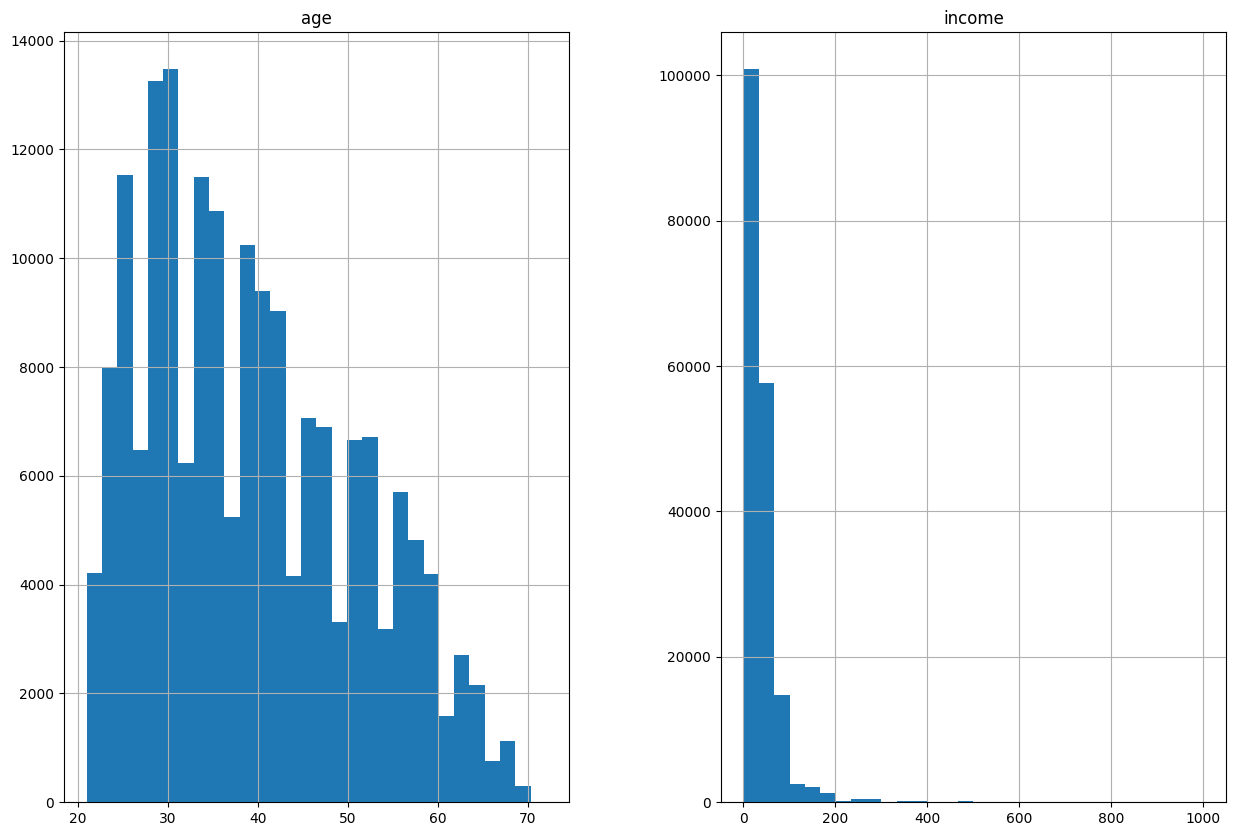

<Axes: >

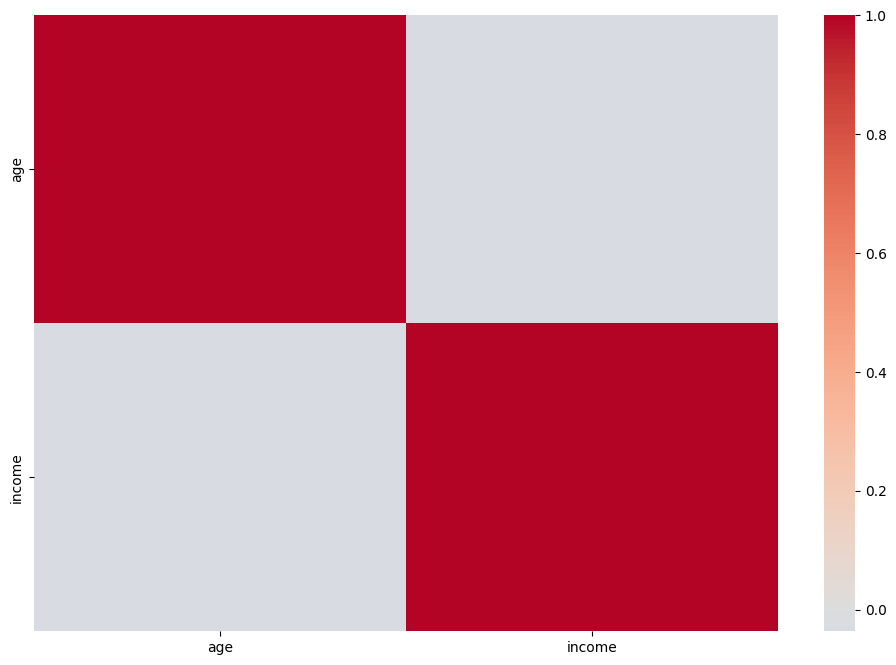

In [21]:
num_cols = df[["age", "income"]].columns.tolist()
df[num_cols].hist(bins=30, figsize=(15,10))
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", center=0)

In [26]:
(df["income"] == 0).sum()

np.int64(0)

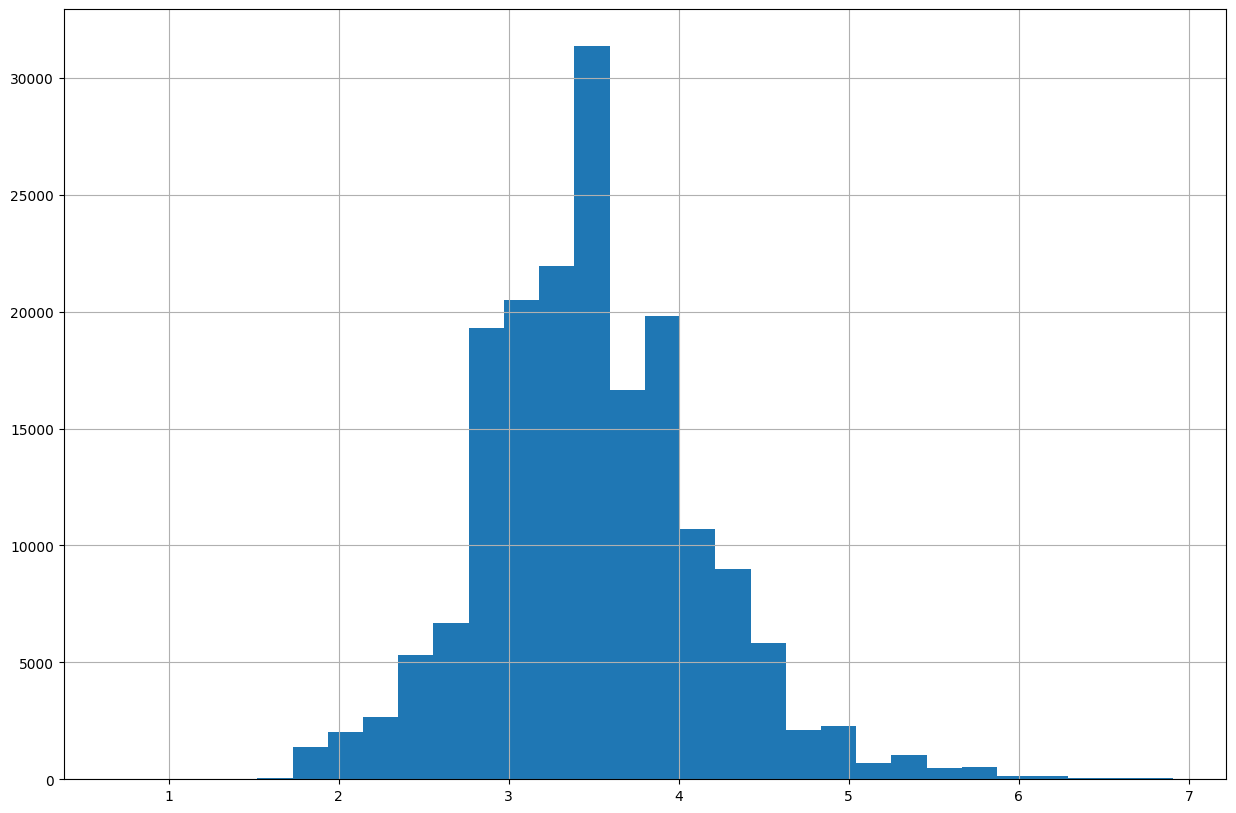

In [28]:
df["income_log"] = np.log1p(df["income"])
df["income_log"].hist(bins=30, figsize=(15,10))
plt.show()

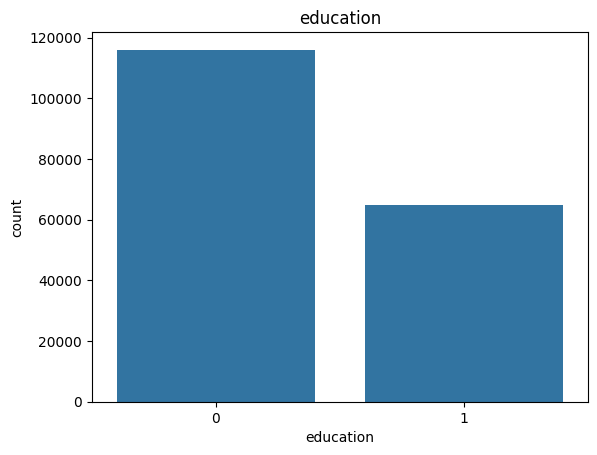

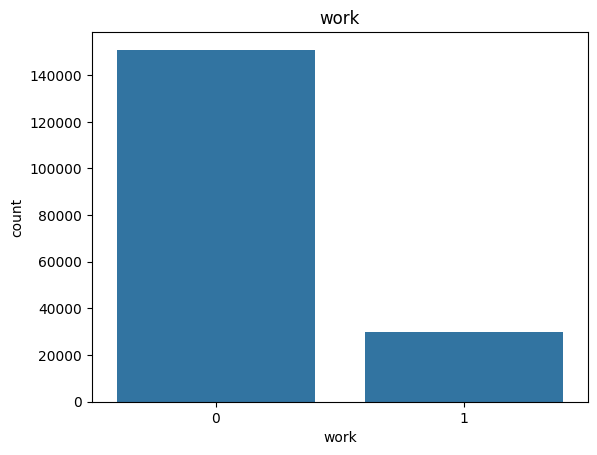

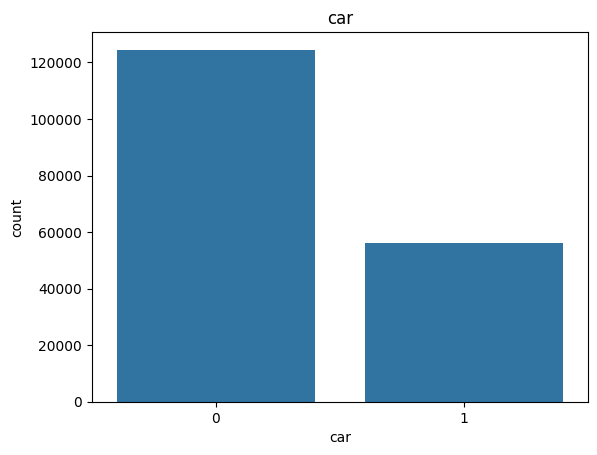

In [23]:
cat_cols = df[["education", "work", "car"]].columns.tolist()
for c in cat_cols:
    sns.countplot(x=c, data=df)
    plt.title(c)
    plt.show()

### Preliminary Findings

- **Target (`default`)**:
  The dataset is highly imbalanced (90/10 split).  
  We should focus on ROC-AUC / PR-AUC, stratified splits.

- **Income**: 
  The raw `income` feature is highly skewed with a heavy concentration near zero.  
  After applying a log transformation (`log1p`), the distribution becomes more balanced.